In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

from utils import convert_to_PCS_circ, convert_to_PCS_circ_largest_clifford
from pauli_checks import ChecksFinder, add_pauli_checks, add_meas_pauli_checks, add_linear_meas_pauli_checks,  search_for_pauli_list
from pauli_checks import gen_initial_layout, gen_final_layout, complete_postprocess, filter_results

### Generate VQE circuit

In [5]:
import numpy as np

from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

In [7]:
def hydrogen_trial_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    # prepare the Hartree-Fock state
    qc.x(0)
    qc.x(1)
    
    qc.rx(np.pi/2, 0)
    qc.h(1)
    qc.h(2)
    qc.h(3)

    # qc.barrier()
    qc.cx(0,1)
    qc.cx(1,2)
    qc.cx(2,3)
    # qc.barrier()
    
    qc.rz(1.0, 3)
    
    qc.cx(2,3)
    qc.cx(1,2)
    qc.cx(0,1)
    
    qc.rx(-np.pi/2, 0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    
    return qc

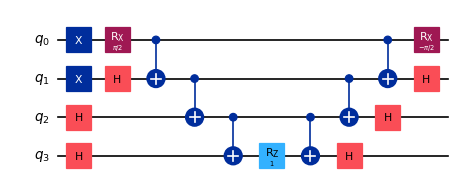

In [9]:
circ = hydrogen_trial_circuit(4)
circ.draw("mpl", scale=0.6)

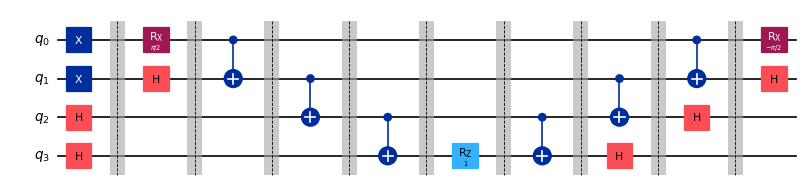

In [11]:
from qiskit_addon_utils.slicing import combine_slices, slice_by_depth

slices = slice_by_depth(circ, 1)
combined_slices = combine_slices(slices, include_barriers=True)
combined_slices.draw("mpl", scale=0.6)

### Add PCS protection on largest clifford

In [14]:
num_qubits = 4
num_checks = 2

sign_list, pcs_circ = convert_to_PCS_circ_largest_clifford(circ, num_qubits, num_checks)

Largest Clifford block is from slice 6 to 8.
Found check 1: +1XXXX, +1IIIX
Found check 2: +1IIIZ, +1IIIZ
Required number of checks found.
p1_list =  [['+1XXXX', '+1IIIX'], ['+1IIIZ', '+1IIIZ']]


['+1', '+1']


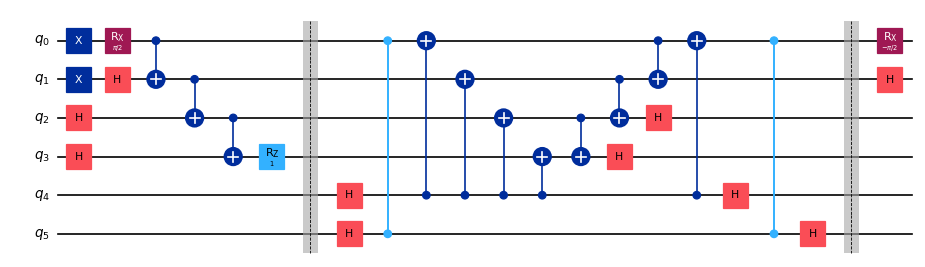

In [16]:
print(sign_list)
pcs_circ.draw("mpl", scale=0.6)